# Project 1  


## Introduction 
*Note: I selected this data set from Kaggle to practice exploring data using python.*

The purpose of our report is to define an algorithm that allows us to predict the selling price of a used car.  The algorithm we are using is Gradient Descent Method.  We create the formula using python and predicted the estimated an used cars resale value based kilometers driven at 10, 15, and 35.

We worked with a [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) data set about used cars sales. We provided a snippet of the data set. 

In [1]:
import pandas as pd
import numpy as np
import math

cars = pd.read_csv("car data.csv")
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Packages we used include:  
- [Pandas](https://pandas.pydata.org/docs/)  
    `Pandas` (`pd`) is a python library used for working with data sets.  It is mainly used for analyzing, manipulating, and visualizing data sets.
- [Matplotlib](https://matplotlib.org/)  
    `Matplotlib` is a python library used for data visualization and graphical plotting of data.
- [Numpy](https://numpy.org/doc/stable/index.html)  
    `Numpy` (`np`)is a python library used for scientific computing for multidimensional arrays.  It also includes mathematical logic, shape manipulation, sorting, basic statistical operations, etc.
- [Math](https://docs.python.org/3/library/math.html)  
    `Math` is a module used for performing math functions on integers or real type objects.

## Exploratory Data Analysis

First we looked at what type of data we had in the used cars dataset. Specifically, we looked to see if we needed to change any variables to a more properly fitted type. 

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


It looks like the variables for seller type, fuel type, transmission, and for Owner are objects, but would work better as categorical variables, so we changed those. 

In [3]:
cars[["Seller_Type", "Owner", "Fuel_Type", "Transmission"]] = \
  cars[["Seller_Type", "Owner", "Fuel_Type", "Transmission"]] \
  .apply(lambda x:x.astype("category"))

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    int64   
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 13.6+ KB


We first looked at the numeric variables. We made a correlation matrix to see how each of them generally impacted the selling price. 

In [4]:
cars[["Selling_Price", "Year", "Kms_Driven", "Present_Price", ]].corr()

,Selling_Price,Year,Kms_Driven,Present_Price
Selling_Price,1.000000,0.236141,0.029187,0.878983
Year,0.236141,1.000000,-0.524342,-0.047584
Kms_Driven,0.029187,-0.524342,1.000000,0.203647
Present_Price,0.878983,-0.047584,0.203647,1.000000


The present price, which can be defined as the showroom price, is a significant determinant of the selling price. This relationship has a positive correlation.  It is expected that year would have an slightly negative impact on the showroom price (present price).  However, this is not the case for the selling price. From the correlation, you would expect there to be an increase in the car's value as it gets older. 

Then we began to explore how the categorical variables affected selling price.  

We looked at the mean selling price (a measure of center) for each type of seller (dealer  or individual) to see confirm our assumption that a dealer would have a higher selling price: 

In [5]:
cars.groupby("Seller_Type")[["Selling_Price"]].mean().round(decimals = 2)

,Selling_Price
Seller_Type,
Dealer,6.72
Individual,0.87


The owner of this data set has chosen to display the selling price and present price in a decimal format.  I assume the dealer on average sold their used cars for 67,200 and the individual person sold it for 8,700.  I expected that the dealer would be able to sale their cars for a higher price, but this seems larger than I expected.

It could be possible that dealers have access to more expensive cars than individuals. It could also be dealer have access to more cars.  We will look at this further.

In [6]:
cars.groupby("Transmission")[["Selling_Price"]].mean().round(decimals = 2)

,Selling_Price
Transmission,
Automatic,9.42
Manual,3.93


Cars with an automatic transmission have a higher resale value than manual transmission vehicles.

In [7]:
cars.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

We can confirm dealers sold more cars (195) compared to individuals (106).

In [8]:
drop_cars = cars.drop(["Year", "Fuel_Type", "Transmission", "Owner"], axis = 1) \
    .groupby("Seller_Type").mean()
drop_cars
drop_cars.groupby("Seller_Type").mean().unstack()

               Seller_Type
Selling_Price  Dealer             6.721692
               Individual         0.870943
Present_Price  Dealer            10.886308
               Individual         1.635283
Kms_Driven     Dealer         39850.133333
               Individual     31606.915094
dtype: float64

This across group summary again confirms dealers are able to sale their cars for a much higher price.  The dealer is able to ask for a higher selling price even though the dealer's vehicles had more mileage.

In [9]:
drop_cars = cars.drop(["Year", "Fuel_Type", "Transmission", "Owner"], axis = 1) \
    .groupby(["Seller_Type","Car_Name"]).mean()
drop_cars
drop_cars.groupby(["Seller_Type","Car_Name"]).mean().unstack()

Selling_Price                                                      \
Car_Name              800 Activa 3g Activa 4g Bajaj  ct 100 Bajaj Avenger 150   
Seller_Type                                                                     
Dealer                NaN       NaN       NaN           NaN               NaN   
Individual           0.35      0.31       0.4          0.18              0.75   

                                                                               \
Car_Name    Bajaj Avenger 150 street Bajaj Avenger 220 Bajaj Avenger 220 dtsi   
Seller_Type                                                                     
Dealer                           NaN               NaN                    NaN   
Individual                       0.6              0.79                  0.525   

                                                         ...   Kms_Driven  \
Car_Name    Bajaj Avenger Street 220 Bajaj Discover 100  ... land cruiser   
Seller_Type                                              ...                
Dealer                           NaN                NaN  ...      78000.0   
Individual                      0.45               0.27  ...          NaN   

                                                                         \
Car_Name        omni      ritz  s cross    swift      sx4         verna   
Seller_Type                                                               
Dealer       50000.0  49292.75  33429.0  39147.0  50740.0  42747.285714   
Individual       NaN       NaN      NaN  16200.0      NaN           NaN   

                                                   
Car_Name    vitara brezza   wagon r         xcent  
Seller_Type                                        
Dealer             2071.0  40644.75  27448.333333  
Individual            NaN       NaN           NaN  

[2 rows x 294 columns]

This across group summary shows the dealer has access to more expensive cars. It looks as if the dealers only sells high end vehicles.  This explains the large difference in selling prices between dealers and individuals.

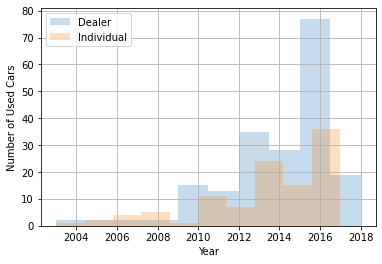

In [10]:
import matplotlib.pyplot as plt

cars.groupby("Seller_Type")["Year"].hist(bins = 10, alpha = 0.25)
plt.xlabel("Year")
plt.ylabel("Number of Used Cars")
plt.legend(cars.Seller_Type.cat.categories)
plt.show()
plt.close()

The histogram of used cars model year grouped by seller_type (dealer or individual) revealed that dealer had access to more cars over time.  In 2016, the dealers sold 80 cars while the individual sold approximately 36.  During 2018, individuals sold no cars and dealers sold approximately 19 vehicles.

Text(0, 0.5, 'Selling Price')

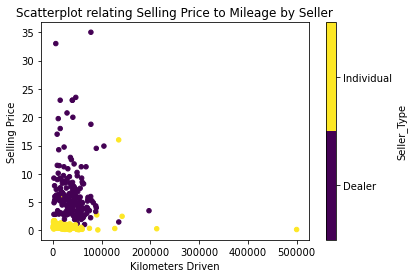

In [11]:
# scatter plot 
fig, ax=plt.subplots()

cars.plot.scatter(x = "Kms_Driven", y = "Selling_Price", c = "Seller_Type",  cmap = "viridis" \
                  ,ax=ax) \
  .set_title("Scatterplot relating Selling Price to Mileage by Seller")
ax.set_xlabel("Kilometers Driven")
plt.ylabel("Selling Price")

This scatterplot also confirms that dealers received an higher resale price.  Most of the cars resold had less then 100,000 miles.

## Prediction of `selling_price`  

In [12]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


### Gradient Descent Method

We used the gradient descent method to find the best prediction of `selling_price` by minimizing the Root Mean Squared Error using a difference quotient for b_0 and b_1.  Ideally, we are looking for the best combination of b_0 and b_1 which produces the smallest non negative number closest to 0.

#### Root Mean Squared Error  
$$ RMSE(b_0, b_1) = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y-b_0 - b_1x)^2} $$

#### Difference Quotient 
$$ diffQuotient b_0 = \frac{RMSE(b_0 + Δ_0, b_1) - RMSE (b_0, b_1)}{Δ_0} $$

$$ diffQuotient b_1 = \frac{RMSE(b_0, b_1 + Δ_1) - RMSE (b_0, b_1)}{Δ_1} $$

- $b_0$ is estimate for y-intercept of linear regression model y =  $b_0x + b_1$
- $b_1$ is estimate for slope of linear regression model y =  $b_0x + b_1$ 
- $Δ_i$ is our our small change for each iteration to move our slope in the direction of a 0 difference
- $ y $ is the actual `selling_price` for observation $ i $  
- $ x $ is the actual `km_driven` for observation $ i $ 
- $ n $ is the number of observations  

In [13]:
# Create a squared error loss function that takes in y and c and outputs (y − c)^2.
def SE(y, c):
    SE = np.square(np.subtract(y,c))
    return(SE)

# Create a root mean squared error (objective) q function that takes in y and c and 
# outputs RMSE(c)
def RMSE(y,c):
    MSE = SE(y,c).mean()
    RMSE = math.sqrt(MSE)
    return(RMSE)

# Create a difference quotient function to approximate the slope of the tangent line 
# that takes in c, Δc, and y
def diffQuotient(c, Δc, y):
    diffQuot = (RMSE(y, c+Δc) - RMSE(y, c))/Δc
    return(diffQuot)

In [14]:
# Function to calculate the Gradient Descent for Y

def findGradient(y):
    """
    Computes the Gradient Descent for one variable b0 (slope).
    """
    cur_c = 0              # initialize  
    new_c = y.mean()       #guess
    step_size = 0.50       #how slowly to move to find where derivative is 0
    num_tot = 0.005        #used to check difference and stop looping
    max_iter = 500000      #max iterations 
    iters = 0
    diff_quotient = 1


    while iters < max_iter:
        cur_c = new_c
        diff_quotient = diffQuotient(cur_c, step_size , y)
        new_c = cur_c - diff_quotient * step_size
        if (abs(new_c - cur_c) < num_tot):
            break
        else:
            cur_c = new_c
            iters = iters +1
           # print("In Loop - iters is ", iters,"new_c ", new_c, "diff_quotient", diff_quotient )

    print("Prediction is ", new_c)


In [15]:
# prediction using Gradient for selling price

y = cars["Selling_Price"]
y = y.to_numpy()

findGradient(y)

Prediction is  4.454283821979338


In [16]:
# prediction using Gradient for km driven

y = cars["Kms_Driven"]
y = y.to_numpy()

findGradient(y)

Prediction is  36947.205976846635


##### Using _y_ and another numeric variable x.

In [17]:
# Create a squared error loss function that takes in y, b0, b1, and x and outputs (y − b0 - b1*x)^2.
def SE2(y, x, b0, b1):
    SE2 = np.square(np.subtract(y,b0, b1*x))
    return(SE2)

# Create a root mean squared error (objective) q function that takes in y, b0, b1, and x and 
# outputs RMSE(c)
def RMSE2(y,x,b0, b1):
    MSE = SE2(y, x, b0, b1).mean()
    RMSE2 = math.sqrt(MSE)
    return(RMSE2)

# Create a difference quotient function to approximate the slope of the tangent line in the 
#direction of b0 that takes in y, b0, b1, Δ0, and x
def diffQuotient_b0(y,x,b0, Δ0, b1):
    diffQuot_b0 = (RMSE2(y, x, b0 +Δ0, b1) - RMSE2(y, x, b0, b1))/Δ0
    return(diffQuot_b0)

# Create a difference quotient function to approximate the slope of the tangent line in the 
#direction of b1 that takes in y, b0, b1, Δ1, and x
def diffQuotient_b1(y,x,b0, Δ1, b1):
    diffQuot_b1 = (RMSE2(y, x, b0, b1 + Δ1) - RMSE2(y, x, b0, b1))/Δ1
    return(diffQuot_b1)

#Determine distance using Euclidean 
def compute_euclidean(a,b):
    return np.sqrt(np.sum((a-b)**2))


In [18]:
# Function to calculate the Gradient Descent for Y and X 

def findGradient2(y, x, b0, b1):
    """
    Computes the Gradient Descent for two variables b0 and b1.
    """
    new_b0 = 0              # initialize new b0 value
    new_b1 = 0              # initialize new b1 value
    step_size_b0 = 0.750    # how slow to move to find where derivative is 0
    step_size_b1 = 0.750    # how slow to move to find where derivative is 0
    num_tot = 0.0005        # distance between vectors to stop looping
    max_iter = 600000       # max iterations 
    iters = 0               # initialize 
    diff_Quot_b0 = 0        # initialize difference quotient for b0
    diff_Quot_b1 = 0        # initialize difference quotient for b1 
    distance = 0            # initialize variable that is compared to num_tot 
    Found = "No"            # initialize while loop to No
    OpFinal = []            # initialize list which holds optimal b0 and b1
    
    cur_b0 = b0             # initialize current b0 to guess
    cur_b1 = b1             # initialize current b1 to guess
    
    while iters < max_iter and Found == "No":
        
        diffQuot_b0 = diffQuotient_b0(y, x, cur_b0, step_size_b0, cur_b1)
        new_b0 = cur_b0 - diffQuot_b0 * step_size_b0
        
        diffQuot_b1 = diffQuotient_b1(y, x, new_b0, step_size_b1, cur_b1)
        new_b1 = cur_b1 - diffQuot_b1 * step_size_b1
        
        cVector = np.array([cur_b0, cur_b1])
        nVector = np.array([new_b0, new_b1])
        
        #distance = np.sqrt(np.sum(np.square(nVector  -  cVector)))
        distance1=compute_euclidean(nVector,cVector)
        
        if (distance < num_tot):              
            cur_b0 = new_b0
            cur_b1 = new_b1
            Found = "Yes"
            
        else:
            cur_b0 = new_b0
            cur_b1 = new_b1
            iters = iters +1
            

    OpFinal = [cur_b0, cur_b1]
    #print("Optimal b0 is ", cur_b0, "Optimal b1 is ", cur_b1, "distance ", distance, " iter", iters)
    print("The prediction for b_0, b_1 is  ", OpFinal)
    return(OpFinal)

In [19]:
y = cars["Selling_Price"]
y = y.to_numpy()
x = cars["Kms_Driven"]
x = x.to_numpy()

b0 = 50000.0     #guess 
b1 = -1.0        #guess

OpFinal = findGradient2(y, x, b0, b1,)

The prediction for b_0, b_1 is   [49999.25000000386, -1.0]


Best combination of $ b_0 $ and $ b_1 $ to predict `selling_price` for `km_driven` of 10000, 25000, and 35000.

In [20]:
# If km_drive = 10,000, then predicted selling_price is: 
OpFinal[0] + OpFinal[1]*10000.0

39999.25000000386

In [21]:
# If km_drive = 25,000, then predicted selling_price is: 
OpFinal[0] + OpFinal[1]*25000.0

24999.250000003864

In [22]:
# If km_drive = 35,000, then predicted selling_price is: 
OpFinal[0] + OpFinal[1]*35000.0

14999.250000003864